# 전국 도시 공원 표준 데이터
https://www.data.go.kr/dataset/15012890/standard.do

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
%ls data

상가업소_201709/
상가업소_201709.zip
상권별_업종밀집통계_2016_.csv
서울특별시_자치구별_상권분석_정보_2017_.csv
전국도시공원표준데이터.csv


In [4]:
park = pd.read_csv('data/전국도시공원표준데이터.csv', encoding='euc-kr')
park.shape

(13135, 18)

In [5]:
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,Unnamed: 17
0,42800-00001,상리공원,어린이공원,강원도 양구군 양구읍 상리 531,강원도 양구군 양구읍 상리 531,38.105771,127.985895,1597,NaN,NaN,NaN,NaN,NaN,1995-12-27,강원도 양구군청,033-480-2927,2018-02-28,NaN
1,42800-00002,정림공원1,어린이공원,강원도 양구군 양구읍 상리 587,강원도 양구군 양구읍 상리 587,38.104065,127.984467,1498,NaN,NaN,NaN,NaN,NaN,2009-09-25,강원도 양구군청,033-480-2927,2018-02-28,NaN
2,42800-00003,정림공원2,어린이공원,강원도 양구군 양구읍 상리 604-6,강원도 양구군 양구읍 상리 604-6,38.104065,127.984467,1499,NaN,NaN,NaN,NaN,NaN,2009-09-25,강원도 양구군청,033-480-2927,2018-02-28,NaN
3,42800-00004,하리수변공원,수변공원,강원도 양구군 양구읍 하리 643,강원도 양구군 양구읍 하리 643,38.118243,127.981634,18437,NaN,NaN,NaN,NaN,NaN,2010-03-19,강원도 양구군청,033-480-2460,2018-02-28,NaN
4,42800-00005,묘지공원,묘지공원,강원도 양구군 양구읍 죽곡리 산3-1,강원도 양구군 양구읍 죽곡리 산3-1,38.125344,127.999027,178931,NaN,NaN,NaN,NaN,NaN,2010-10-01,강원도 양구군청,033-480-2576,2018-02-28,NaN


In [6]:
from plotnine import *

In [7]:
park['소재지도로명주소'].isnull().sum()

5898

In [8]:
park['소재지지번주소'].isnull().sum()

1204

In [9]:
park.loc[(park['소재지도로명주소'].isnull()) & (park['소재지지번주소'].notnull())].shape

(5898, 18)

In [10]:
park['소재지도로명주소'].fillna(park['소재지지번주소'], inplace = True)

In [11]:
park['소재지도로명주소'].isnull().sum()

0

In [12]:
park_loc = park.loc[(park['소재지도로명주소'].isnull()) & (park['소재지지번주소'].notnull())]
park_loc.shape

(0, 18)

In [13]:
park['시도'] = park['소재지도로명주소'].str.split(' ', expand=True)[0]
park.head(3)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,Unnamed: 17,시도
0,42800-00001,상리공원,어린이공원,강원도 양구군 양구읍 상리 531,강원도 양구군 양구읍 상리 531,38.105771,127.985895,1597,NaN,NaN,NaN,NaN,NaN,1995-12-27,강원도 양구군청,033-480-2927,2018-02-28,NaN,강원도
1,42800-00002,정림공원1,어린이공원,강원도 양구군 양구읍 상리 587,강원도 양구군 양구읍 상리 587,38.104065,127.984467,1498,NaN,NaN,NaN,NaN,NaN,2009-09-25,강원도 양구군청,033-480-2927,2018-02-28,NaN,강원도
2,42800-00003,정림공원2,어린이공원,강원도 양구군 양구읍 상리 604-6,강원도 양구군 양구읍 상리 604-6,38.104065,127.984467,1499,NaN,NaN,NaN,NaN,NaN,2009-09-25,강원도 양구군청,033-480-2927,2018-02-28,NaN,강원도


In [14]:
park['구군'] = park['소재지도로명주소'].str.split(' ', expand=True)[1]
park.head(3)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,Unnamed: 17,시도,구군
0,42800-00001,상리공원,어린이공원,강원도 양구군 양구읍 상리 531,강원도 양구군 양구읍 상리 531,38.105771,127.985895,1597,NaN,NaN,NaN,NaN,NaN,1995-12-27,강원도 양구군청,033-480-2927,2018-02-28,NaN,강원도,양구군
1,42800-00002,정림공원1,어린이공원,강원도 양구군 양구읍 상리 587,강원도 양구군 양구읍 상리 587,38.104065,127.984467,1498,NaN,NaN,NaN,NaN,NaN,2009-09-25,강원도 양구군청,033-480-2927,2018-02-28,NaN,강원도,양구군
2,42800-00003,정림공원2,어린이공원,강원도 양구군 양구읍 상리 604-6,강원도 양구군 양구읍 상리 604-6,38.104065,127.984467,1499,NaN,NaN,NaN,NaN,NaN,2009-09-25,강원도 양구군청,033-480-2927,2018-02-28,NaN,강원도,양구군


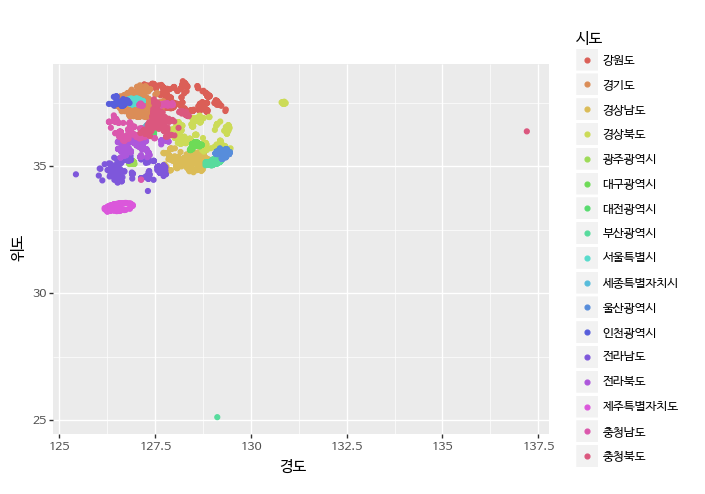

<ggplot: (-9223372036564369748)>

In [15]:
# 지도를 출력해 보니 특정 지역만 있는거 같다.
# 결측치인 nan 데이터 때문에 다른 데이터가 제대로 보이지 않았다.
# nan 데이터를 제거하고 다시 그려야겠다.
(ggplot(park)
 + aes(x='경도', y='위도', color='시도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [16]:
park_loc_notnull = park.loc[(park['위도'].notnull()) & (park['경도'].notnull()) & park['시도'].notnull()]
park_loc_notnull.shape

(13129, 20)

In [17]:
park_loc_notnull['시도'].value_counts()

경기도        3675
서울특별시      1226
전라북도       1076
충청북도        905
경상남도        881
울산광역시       822
강원도         623
전라남도        623
부산광역시       611
경상북도        465
충청남도        457
대구광역시       454
대전광역시       421
인천광역시       292
광주광역시       276
제주특별자치도     252
세종특별자치시      70
Name: 시도, dtype: int64

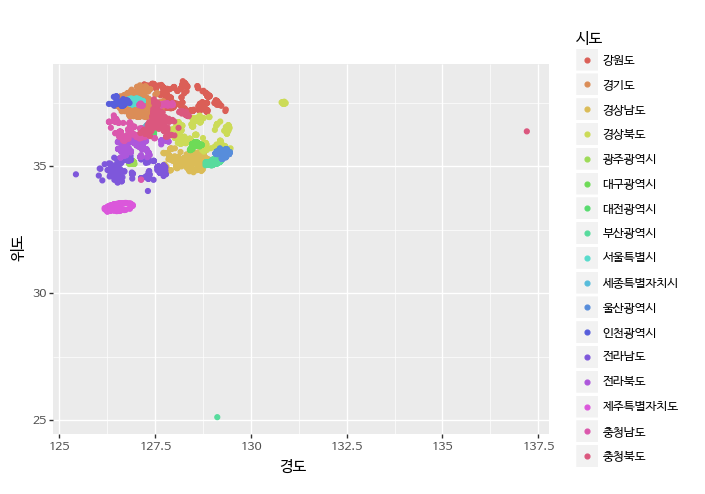

<ggplot: (290824445)>

In [18]:
(ggplot(park_loc_notnull)
 + aes(x='경도', y='위도', color='시도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [19]:
# 위에 그린 위도 경도 그래프를 잘못 그린걸까? 경기도 이외의 데이터들이 제대로 그려지지 않은 거 같다.
park_do = park['시도'].value_counts()
park_do = park_do.reset_index()
park_do.columns = ['시도', '합계']
park_do.sort_values(['합계'], ascending=False)

,시도,합계
0,경기도,3675
1,서울특별시,1230
2,전라북도,1076
3,충청북도,905
4,경상남도,881
5,울산광역시,822
6,강원도,623
7,전라남도,623
8,부산광역시,613
9,경상북도,465


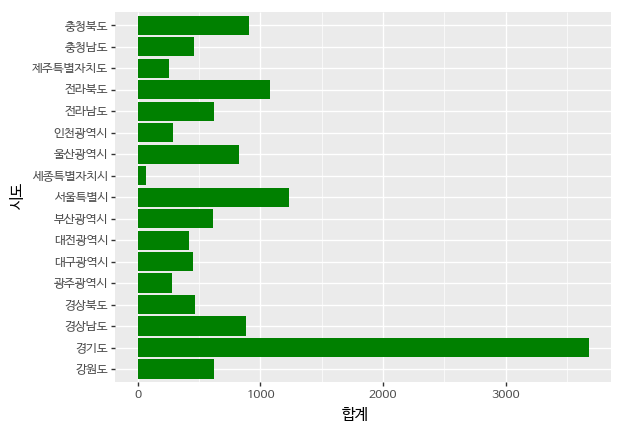

<ggplot: (-9223372036569360359)>

In [20]:
# 경기도가 압도적으로 많다.
(ggplot(park_do)
 + aes(x='시도', y='합계')
 + geom_bar(stat='identity', position='dodge', fill='green')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [21]:
park_type = park['공원구분'].value_counts().reset_index()
park_type.columns = ('공원구분', '합계')
park_type

,공원구분,합계
0,어린이공원,7375
1,근린공원,3148
2,소공원,1723
3,문화공원,205
4,수변공원,199
5,체육공원,162
6,기타,159
7,역사공원,115
8,묘지공원,35
9,도시자연공원,5


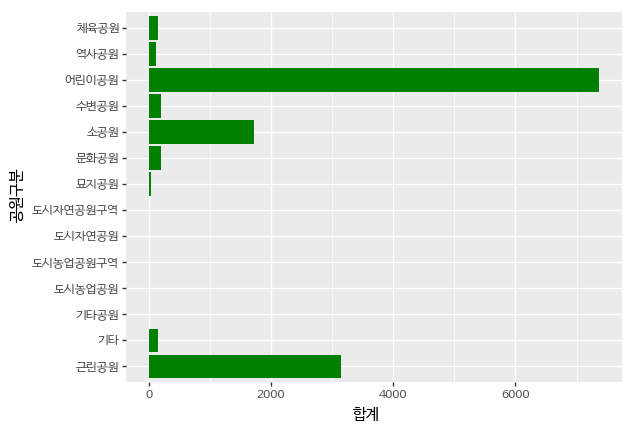

<ggplot: (291445042)>

In [22]:
(ggplot(park_type)
 + aes(x='공원구분', y='합계')
 + geom_bar(stat='identity', position='dodge', fill='green')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)

## 경기도
* 경기도에는 가장 많은 공원이 있다. 어떻게 분포되어 있는지 그려보자.

In [23]:
gg = park.loc[park['시도'] == '경기도']
gg.shape

(3675, 20)

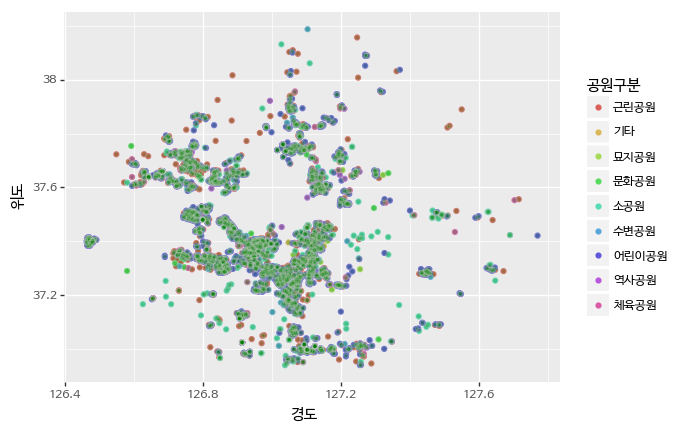

<ggplot: (-9223372036563347242)>

In [24]:
(ggplot(gg)
 + aes(x='경도', y='위도', color='공원구분') 
 + geom_point()
 + geom_jitter(fill='green', color='lightgray', alpha=0.25)
 + theme(text=element_text(family='NanumBarunGothic'))
)

## 서울특별시

In [25]:
seoul = park.loc[park['시도'] == '서울특별시']
seoul.shape

(1230, 20)

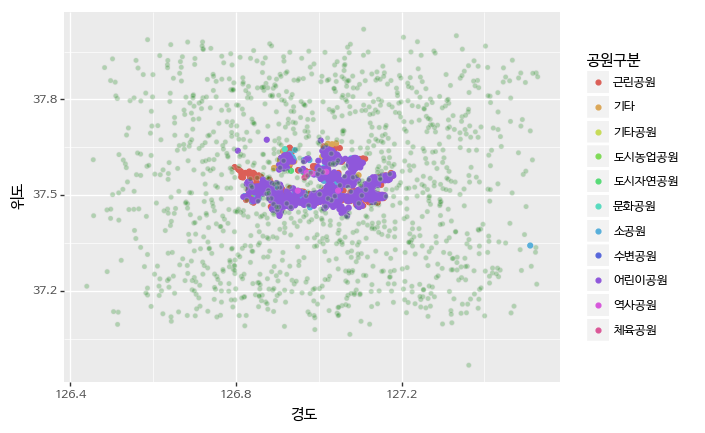

<ggplot: (292492015)>

In [26]:
(ggplot(seoul)
 + aes(x='경도', y='위도', color='공원구분') 
 + geom_point()
 + geom_jitter(fill='green', color='lightgray', alpha=0.25)
 + scale_fill_gradient(low = 'green', high = 'brown') 
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [27]:
park['공원구분'].value_counts()

어린이공원       7375
근린공원        3148
소공원         1723
문화공원         205
수변공원         199
체육공원         162
기타           159
역사공원         115
묘지공원          35
도시자연공원         5
도시농업공원         5
도시자연공원구역       2
기타공원           1
도시농업공원구역       1
Name: 공원구분, dtype: int64

In [28]:
seoul_playground = park.loc[(park['공원구분'] == '어린이공원') & (park['시도'] == '서울특별시')]

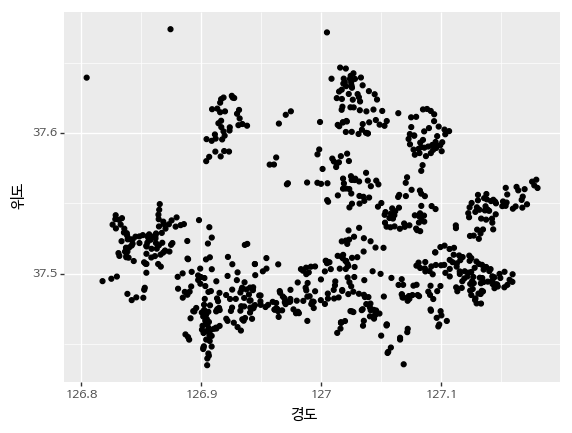

<ggplot: (-9223372036564369706)>

In [29]:
# 특정 지역에는 어린이 공원이 부족해 보인다. 왜 그럴까?
(ggplot(seoul_playground)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [30]:
gu = '강남구 강동구 강북구 강서구 관악구 광진구 구로구 금천구 노원구 도봉구 동대문구 동작구 마포구 서대문구 서초구 성동구 성북구 송파구 양천구 영등포구 용산구 은평구 종로구 중구 중랑구'
gu = gu.split(' ')
print('서울에는 {}개의 구가 있다.'.format(len(gu)))

서울에는 25개의 구가 있다.


In [31]:
# 무악동이 구군 데이터에 잘못 들어와 있다. 전처리 해줄 필요가 있다.
seoul_playground_gu = seoul_playground['구군'].value_counts().reset_index()
seoul_playground_gu_count = seoul_playground_gu.shape[0]
print('아래 데이터를 보니 몇 개 구가 누락된것을 알 수 있다. 전체 {}개 구 중 {}개 구만 있다.'.format(len(gu), seoul_playground_gu_count))
seoul_playground_gu

아래 데이터를 보니 몇 개 구가 누락된것을 알 수 있다. 전체 25개 구 중 19개 구만 있다.


,index,구군
0,송파구,89
1,서초구,85
2,양천구,73
3,관악구,64
4,강남구,64
5,강동구,53
6,금천구,41
7,중랑구,41
8,강북구,35
9,은평구,34


* 공공데이터 포털에 확인해 보니 전국도시공원표준데이터.xls 외에 202개의 파일이 더 있는 것이 확인 된다. 
* https://www.data.go.kr/dataset/15012890/standard.do

* 그럼 서울시에 어린이 공원을 포함해 어떤 공원들이 있는지 본다.

In [32]:
# 서울에는 주로 어떤 공원이 있을까?
seoul['공원구분'].value_counts()

어린이공원     763
근린공원      292
소공원       113
기타         42
문화공원        6
역사공원        6
수변공원        3
도시자연공원      2
체육공원        1
기타공원        1
도시농업공원      1
Name: 공원구분, dtype: int64

In [33]:
# 경기도는 어떨까?
gg['공원구분'].value_counts()

어린이공원    2037
근린공원      894
소공원       475
문화공원       76
체육공원       73
수변공원       64
역사공원       34
묘지공원       12
기타         10
Name: 공원구분, dtype: int64

In [34]:
park_unique = pd.pivot_table(park, index=['공원구분', '시도'], aggfunc=len)
park_unique.head()

Unnamed: 17     경도  공원면적  공원명  공원보유시설(교양시설)  공원보유시설(기타시설)  \
공원구분 시도                                                                 
근린공원 강원도          126.0  126.0   126  126           126           126   
     경기도          894.0  894.0   894  894           894           894   
     경상남도         203.0  203.0   203  203           203           203   
     경상북도          96.0   96.0    96   96            96            96   
     광주광역시         69.0   69.0    69   69            69            69   

            공원보유시설(운동시설)  공원보유시설(유희시설)  공원보유시설(편익시설)  관리기관명  관리번호   구군  \
공원구분 시도                                                                  
근린공원 강원도             126           126           126    126   126  126   
     경기도             894           894           894    894   894  894   
     경상남도            203           203           203    203   203  203   
     경상북도             96            96            96     96    96   96   
     광주광역시            69            69            69     69    69   69   

            데이터기준일자  소재지도로명주소  소재지지번주소     위도  전화번호  지정고시일  
공원구분 시도                                                     
근린공원 강원도        126       126      126  126.0   126    126  
     경기도        894       894      894  894.0   894    894  
     경상남도       203       203      203  203.0   203    203  
     경상북도        96        96       96   96.0    96     96  
     광주광역시       69        69       69   69.0    69     69

In [35]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', 'Unnamed: 17',
       '시도', '구군'],
      dtype='object')

In [36]:
park_unique = pd.pivot_table(park, index=['시도', '구군'], columns='공원구분')
park_unique.head()

경도                                                   \
공원구분           근린공원          기타 기타공원 도시농업공원 도시농업공원구역 도시자연공원 도시자연공원구역   
시도  구군                                                                 
강원도 강릉시  128.877562         NaN  NaN    NaN      NaN    NaN      NaN   
    고성군  128.282820  128.265505  NaN    NaN      NaN    NaN      NaN   
    동해시  129.113660         NaN  NaN    NaN      NaN    NaN      NaN   
    삼척시  129.165181         NaN  NaN    NaN      NaN    NaN      NaN   
    양구군         NaN         NaN  NaN    NaN      NaN    NaN      NaN   

                                               ...          위도         \
공원구분           묘지공원        문화공원         소공원    ...    도시농업공원구역 도시자연공원   
시도  구군                                         ...                      
강원도 강릉시         NaN  128.915411  128.855840    ...         NaN    NaN   
    고성군         NaN         NaN  128.279403    ...         NaN    NaN   
    동해시         NaN         NaN  129.103602    ...         NaN    NaN   
    삼척시         NaN         NaN  129.247329    ...         NaN    NaN   
    양구군  127.999027         NaN         NaN    ...         NaN    NaN   

                                                                              \
공원구분    도시자연공원구역       묘지공원       문화공원        소공원       수변공원      어린이공원 역사공원   
시도  구군                                                                         
강원도 강릉시      NaN        NaN  37.751991  37.810613        NaN  37.775079  NaN   
    고성군      NaN        NaN        NaN  38.229283        NaN  38.265700  NaN   
    동해시      NaN        NaN        NaN  37.509552  37.486651  37.507288  NaN   
    삼척시      NaN        NaN        NaN  37.311655        NaN  37.416685  NaN   
    양구군      NaN  38.125344        NaN        NaN  38.118243  38.105019  NaN   

                   
공원구분         체육공원  
시도  구군             
강원도 강릉시       NaN  
    고성군  38.23085  
    동해시       NaN  
    삼척시       NaN  
    양구군       NaN  

[5 rows x 28 columns]